## Занятие №10

### Линейная регрессия

- Задача: на основе наблюдаемых точек построить прямую, которая отображает свзяь между двумя или более переменными .abs
- Регрессия пытается "подогнать" функцию к наблюдаемым данным, чтобы спрогнозировать новые данные
- Линейная регрессия подгоняем данные к прямой линии, пытаемся установить линейную связь меду переменными и предсказать новые данные

(100, 1)
(100,)


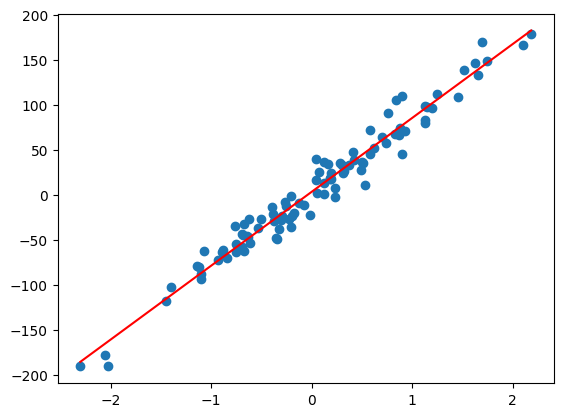

In [3]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

features, target = make_regression(
    n_samples=100, n_features=1, n_informative=1, noise=15, random_state=1
)
print(features.shape)
print(target.shape)
model = LinearRegression().fit(features, target)
plt.scatter(features, target)

x = np.linspace(features.min(), features.max(), 100)

# y= kx + b
plt.plot(x, model.coef_[0] * x + model.intercept_, color="red")


plt.show()

### Простая линейная регрессия

Линейная -> линейная зависимость
- + прогнозирование на новых данных
- + анализ взаимного влияния переменных друг на друга

- Точки обучаемых данных НЕ будут точно лежать на прямой (шума) => область погрешности
- НЕ позволяет делать прогнозы ВНЕ диапазона имеющихся данных

Данные, на основании которых разрабатывается модель - это выборка из совокупности, хотелось бы, чтобы это была РЕПРЕЗЕНТАТИВНАЯ выборка

### Аналитическое решение

In [6]:
import numpy as np

data = np.array(
    [
        [1, 5],
        [2, 7],
        [3, 7],
        [4, 10],
        [5, 11],
        [6, 14],
        [7, 17],
        [8, 19],
        [9, 22],
        [10, 28],
    ]
)
x = data[:, 0]
y = data[:, 1]
n = len(x)
w_1 = (
    n * sum(x[i] * y[i] for i in range(n))
    - sum(x[i] for i in range(n)) * sum(y[i] for i in range(n))
) / (n * sum(x[i] ** 2 for i in range(n)) - sum(x[i] for i in range(n)) ** 2)
w_0 = sum(y[i] for i in range(n)) / n - w_1 * sum(x[i] for i in range(n)) / n
print(w_1, w_0)

2.4 0.8000000000000007


### Метод обратных матриц

In [9]:
import numpy as np
from numpy.linalg import inv

data = np.array(
    [
        [1, 5],
        [2, 7],
        [3, 7],
        [4, 10],
        [5, 11],
        [6, 14],
        [7, 17],
        [8, 19],
        [9, 22],
        [10, 28],
    ]
)
x = data[:, 0]
y = data[:, 1]
n = len(x)
x_1 = np.vstack([x, np.ones(len(x))]).T
w = inv(x_1.transpose() @ x_1) @ (x_1.transpose() @ y)
print(w)

[2.4 0.8]


### Метод разложение матриц

In [10]:
import numpy as np
from numpy.linalg import qr

data = np.array(
    [
        [1, 5],
        [2, 7],
        [3, 7],
        [4, 10],
        [5, 11],
        [6, 14],
        [7, 17],
        [8, 19],
        [9, 22],
        [10, 28],
    ]
)
x = data[:, 0]
y = data[:, 1]
n = len(x)
x_1 = np.vstack([x, np.ones(len(x))]).T
Q,R=qr(x_1)
w=inv(R).dot(Q.transpose()).dot(y)
print(w)

[2.4 0.8]


### Метод градиентного спуска

2.999999999999889 4.0


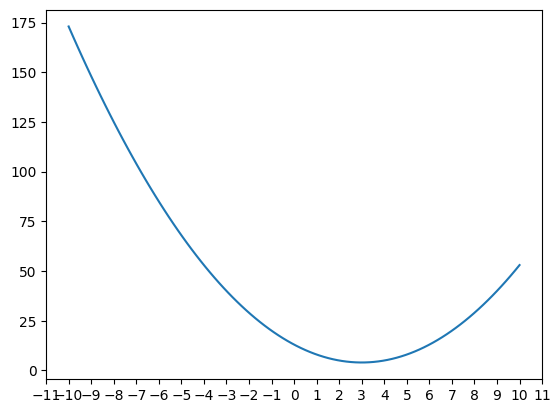

In [29]:
import numpy as np
import random

# y = (x-3)**2 + 4


def f(x):
    return (x - 3) ** 2 + 4


def dx_f(x):
    return 2 * x - 6


x = np.linspace(-10, 10, 100)
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
plt.plot(x, f(x))
# plt.plot(x, dx_f(x))

L = 0.001
iterations = 100_000
x = random.randint(0, 5)
for i in range(iterations):
    d_x = dx_f(x)
    x -= L * d_x
print(x, f(x))
# x = 3, f(x) = 4

plt.show()

### Как градиентный спуск работает с линейной регрессией

In [38]:
import numpy as np
import random

data = np.array(
    [
        [1, 5],
        [2, 7],
        [3, 7],
        [4, 10],
        [5, 11],
        [6, 14],
        [7, 17],
        [8, 19],
        [9, 22],
        [10, 28],
    ]
)
x = data[:, 0]
y = data[:, 1]
n = len(x)

w0 = 0.0
w1 = 0.0


L = 0.001
iterations = 100_000
for i in range(iterations):
    D_w0 = 2 * sum((-y[i] + w0 + w1 * x[i]) for i in range(n))
    D_w1 = 2 * sum((x[i] * (-y[i] + w0 + w1 * x[i])) for i in range(n))
    w0 -= L * D_w0
    w1 -= L * D_w1

print(w1, w0)


plt.show()

2.4000000000000026 0.7999999999999835


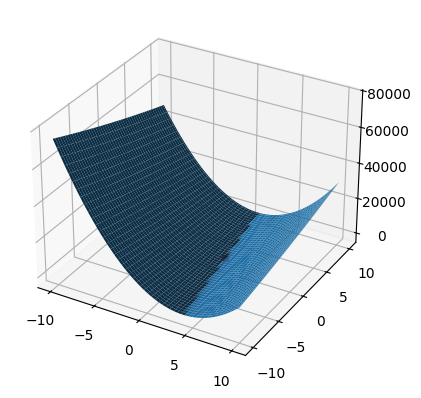

In [39]:
w1 = np.linspace(-10, 10, 100)
w0 = np.linspace(-10, 10, 100)


def E(w1, w0, x, y):
    return sum((y[i] - (w0 + w1 * x[i])) ** 2 for i in range(len(x)))


W1, W0 = np.meshgrid(w1, w0)
EW = E(W1, W0, x, y)
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(W1, W0, EW)

w1_fit = 2.4
w0_fit = 0.8
E_fit = E(w1_fit, w0_fit, x, y)
ax.scatter3D(w1_fit, w0_fit, E_fit, color="red")